In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
sns.set_theme()

In [19]:
with open ('tom_1.txt','r', errors='ignore',encoding='utf-8') as t:
    t1 = t.read().lower()
    t1 = re.sub('[^а-я ]','', t1)
    
with open ('tom_2.txt','r', errors='ignore',encoding='utf-8') as t:
    t2 = t.read().lower()
    t2 = re.sub('[^а-я ]','', t1)    
    
with open ('tom_3.txt','r', errors='ignore',encoding='utf-8') as t:
    t3 = t.read().lower()
    t3 = re.sub('[^а-я ]','', t1)    
    
with open ('tom_4.txt','r', errors='ignore',encoding='utf-8') as t:
    t4 = t.read().lower()
    t4 = re.sub('[^а-я ]','', t1)    

In [20]:
text = t1+t2+t3+t4

In [25]:
russ = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '

pos = {l:i for i,l in enumerate(russ)}
probabilities = np.zeros((len(russ), len(russ)))


In [26]:
for i,item in zip(text[:-1],text[1:]):
    probabilities[pos[i]][pos[item]]+=1

In [27]:
probabilities = probabilities/ (probabilities.sum(axis=1)[:, None])
probabilities

array([[2.43459785e-04, 9.60559515e-03, 4.88911513e-02, ...,
        1.09999557e-02, 3.94183524e-02, 2.30290824e-01],
       [7.86927542e-02, 1.72006020e-03, 2.58009030e-03, ...,
        4.30015051e-04, 3.20361213e-02, 1.65555794e-02],
       [1.49332581e-01, 4.03274590e-04, 8.06549179e-04, ...,
        4.03274590e-05, 3.22619672e-03, 1.56067266e-01],
       ...,
       [2.86204923e-04, 5.63823698e-02, 2.57584430e-03, ...,
        6.58271322e-03, 0.00000000e+00, 5.99599313e-01],
       [1.60359205e-04, 1.84413085e-03, 1.47530468e-02, ...,
        4.40987813e-03, 1.03431687e-02, 5.61577935e-01],
       [1.66954415e-02, 4.19600647e-02, 8.54296794e-02, ...,
        3.61568847e-04, 9.04826040e-03, 7.78367336e-02]])

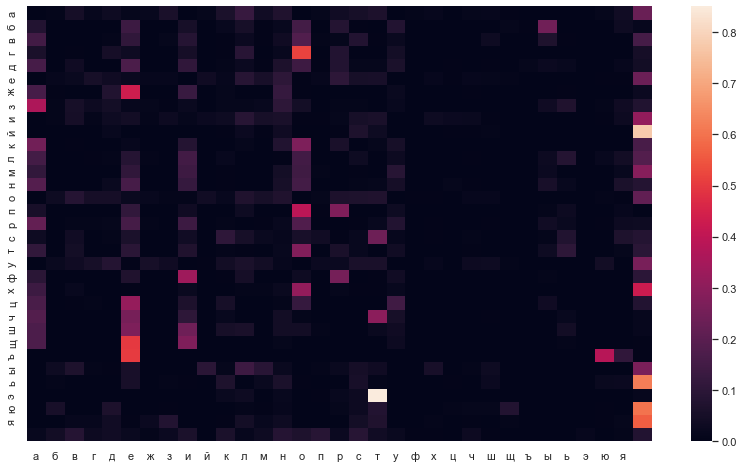

In [28]:
df = pd.DataFrame(probabilities,index=(c for c in russ),columns=(c for c in russ))
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [29]:
start = pos['п']
end = pos['р']
prior = 1. / len(russ)
l = []
for c in russ:

        for i in russ:
            
            proba = prior * probabilities[start, pos[c]]\
                            * probabilities[pos[c],pos[i]]  * probabilities[pos[i], end]
            
            if proba > 0:
                l.append(''.join(['п', c, i,'р']))
                print(''.join(['п', c, i,'р']), proba)


паар 1.5061351793705292e-08
пабр 1.2833832817733416e-06
павр 9.648307494023012e-07
пагр 1.7146458456734145e-06
падр 3.893995142608321e-06
паер 2.001660712051923e-06
пазр 8.877122491444863e-07
паир 4.083708029479565e-08
пайр 1.041487392006928e-07
пакр 5.663637668310273e-06
памр 1.1227144827140014e-07
панр 9.401363397446331e-08
паор 6.014564081974679e-08
папр 4.691082483510411e-06
парр 8.06404404392779e-08
паср 5.173274580441412e-07
патр 6.3079071129699075e-06
паур 7.561367461116382e-08
пафр 2.9664657471148397e-06
пахр 2.3339491382319305e-07
пачр 3.213660425393409e-08
пашр 8.826534245342913e-09
пащр 3.5839348164657108e-09
паэр 6.388386991014487e-10
паюр 2.193560226701263e-07
паяр 1.3315233431953304e-07
па р 9.215128850568225e-06
пгар 4.44647688184054e-08
пгвр 1.0530581070148275e-09
пгдр 7.756587090126229e-08
пгер 6.517972817132631e-08
пгзр 1.7108905732639786e-11
пгир 1.1019696606047729e-08
пгкр 6.733195590444406e-09
пгмр 2.2495327691520343e-11
пгнр 2.660638804537306e-10
пгор 6.5493997919

In [9]:
### :)) 
l[77]

'пидр'

* Код ниже с while имел под собой хорошую задумку, но реализуется бесконечно долго

In [37]:
end='cvfgk'
beginn = 'б'


### крутим цикл до тех пор, пока end не будет найдет во всем тексте
while end not in text:  
    
    word = []
    ### инициализируем начало слова
    word.append(beginn)
    
    for i in range(40):
    
        index = pos[word[-1]]
        word.append(np.random.choice(list(russ), p=probabilities[index]))
        
        ### результат с пробелом в середине нам не нужен, удаляем пробел
        if ' ' in word:
            word.remove(' ')
        
        ### если набралось 8 букв без пробела прерываем цикл
        if len(word)>=8:
            break
            
    end = ''.join(word) 
    ### чтобы точно получить отдельное слово обрамляем его двумя прабелами с двух сторон
    end = ' '+ end
print(end)

 былотоль


* Ниже сценарий попроще, но зато быстро реализовывается, правда выдавая часто несуществующие слова

In [30]:
end='cvfgk'
beginn = 'б'

word = []
word.append(beginn)
for i in range(100):
    
    
    index = pos[word[-1]]
    word.append(np.random.choice(list(russ), p=probabilities[index]))
    
    if ' ' in word:
        word.remove(' ')
        
    if len(word)>=8:
        break
        
end = ''.join(word) 
# end = ' '+ end
print(end)

блонейсо


In [31]:
series = pd.read_csv( 'mean-monthly-air-temperature-deg.csv')["Deg"]
series

0      40.6
1      40.8
2      44.4
3      46.7
4      54.1
       ... 
235    61.8
236    58.2
237    46.7
238    46.6
239    37.8
Name: Deg, Length: 240, dtype: float64

In [32]:
values = series.values.reshape(-1,1)
values

array([[40.6],
       [40.8],
       [44.4],
       [46.7],
       [54.1],
       [58.5],
       [57.7],
       [56.4],
       [54.3],
       [50.5],
       [42.9],
       [39.8],
       [44.2],
       [39.8],
       [45.1],
       [47. ],
       [54.1],
       [58.7],
       [66.3],
       [59.9],
       [57. ],
       [54.2],
       [39.7],
       [42.8],
       [37.5],
       [38.7],
       [39.5],
       [42.1],
       [55.7],
       [57.8],
       [56.8],
       [54.3],
       [54.3],
       [47.1],
       [41.8],
       [41.7],
       [41.8],
       [40.1],
       [42.9],
       [45.8],
       [49.2],
       [52.7],
       [64.2],
       [59.6],
       [54.4],
       [49.2],
       [36.6],
       [37.6],
       [39.3],
       [37.5],
       [38.3],
       [45.5],
       [53.2],
       [57.7],
       [60.8],
       [58.2],
       [56.4],
       [49.8],
       [44.4],
       [43.6],
       [40. ],
       [40.5],
       [40.8],
       [45.1],
       [53.8],
       [59.4],
       [63

In [16]:
from hmmlearn.hmm import GaussianHMM

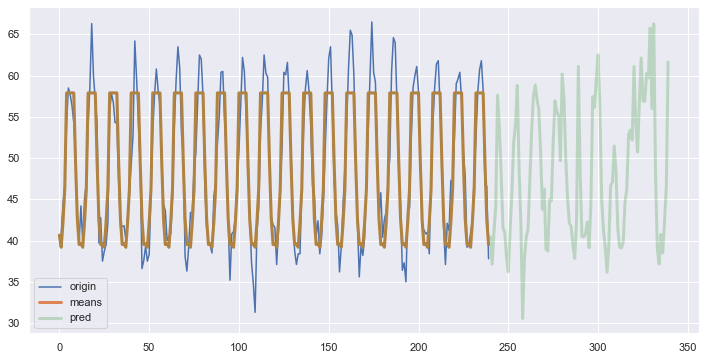

In [36]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)

means = np.zeros_like(values)


for i in range(model.n_components):

        means[labels == i] = model.means_[i]

### чтобы было заметнее на графике 
X, Z = model.sample(100)

plt.figure(figsize=(12, 6))
plt.plot(values,label='origin')
plt.plot(means, linewidth=3,label='means')
plt.plot(np.append(means,X), linewidth=3,label='pred',color='green',alpha=0.2)


plt.legend()